In [2]:
from movielens_fairness_env import prepare_environment
from random_agent import RandomAgent
from benchmark import run
from ddqn import create_ddqn_agent
import pandas as pd
import seaborn as sns

executions = 1
episodes = 300
env = prepare_environment()

def rewards_df(rewards, agent_name):
    df = pd.Series(rewards).expanding().mean().to_frame()
    df.rename(columns={0:'reward'}, inplace=True)
    df['episode'] = range(episodes)
    df['agent'] = agent_name
    return df

ModuleNotFoundError: No module named 'movielens_fairness_env'

In [15]:
plot_data = pd.DataFrame()

for i in range(executions):
    print(f'exec {i}')
    agent = RandomAgent(env)
    random_rewards = run(agent, env, episodes = episodes)
    plot_data = pd.concat([plot_data, rewards_df(random_rewards, 'random')])
    agent = create_ddqn_agent(env)
    dqn_rewards = run(agent, env, episodes = episodes)
    plot_data = pd.concat([plot_data, rewards_df(dqn_rewards, 'ddqn')])

exec 0
 ep 299

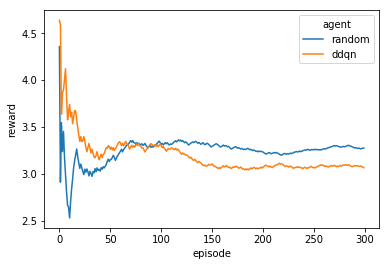

In [16]:
sns.lineplot(data=plot_data, x='episode', y='reward', hue='agent')